# *__Time-Frequency Analysis - a deep dive__*

---

I created this Jupyter Notebook mainly to teach my "Self" in depth the science behind Time-Frequency Analysis. 

You can use it as a refresher or learn completely from scratch if you are interested.

#

### __What are signals ?__

A signal carries information.

In the digital era , information is expressed by numbers.
For some kind of information, like school grades , stock values or written texts like books and poems (if we assign a numbers to each letter  according to ASCII or UNICODE standard) digital representations is natural and direct. 

In this context, when we say that a "digital representation is natural and direct," we mean that certain types of information can be easily converted into numbers in a straightforward and intuitive manner. In this context, when we say that a "digital representation is natural and direct," we mean that certain types of information can be easily converted into numbers in a straightforward and intuitive manner.

Before we dive deeper let's consider consequences of the digital storage and processing of signals.

## __SAMPLING__

Storing analog signal in digital from i.e as a sequence of numbers we measure its values in a series of time instants. 

Measurements are usually equally spaced in time by so called *__"constant Sampling Interval"__.*

On the other hand the *__"Sampling frequency"__* is the numebr of samples per second (in Hz).

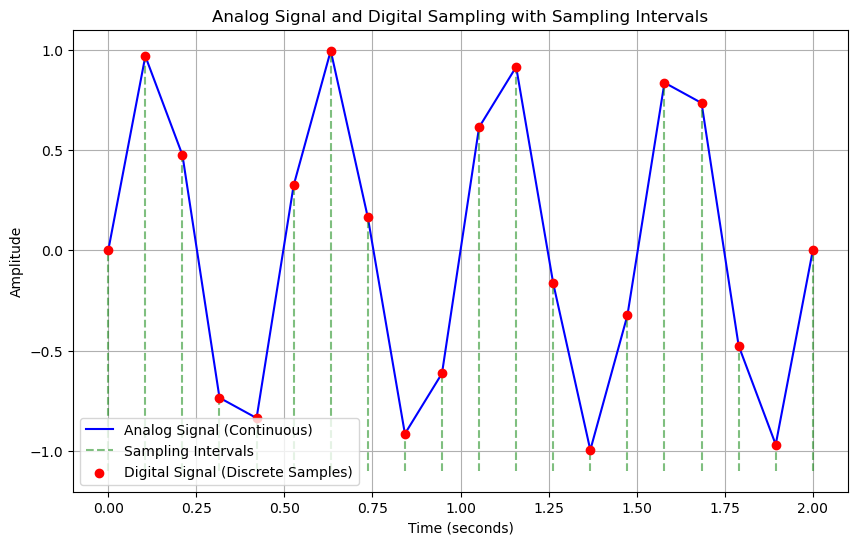

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
sampling_rate = 10  # Sampling rate in Hz (samples per second)
duration = 2  # Duration in seconds
t = np.linspace(0, duration, sampling_rate * duration)  # Time instants
analog_signal = np.sin(2 * np.pi * 2 * t)  # Example analog signal (sine wave at 2 Hz)
plt.figure(figsize=(10, 6))
plt.plot(t, analog_signal, label='Analog Signal (Continuous)', color='blue')
plt.vlines(t, ymin=-1.1, ymax=analog_signal, color='green', linestyle='--', alpha=0.5, label='Sampling Intervals')
plt.scatter(t, analog_signal, color='red', label='Digital Signal (Discrete Samples)', zorder=5)
plt.title('Analog Signal and Digital Sampling with Sampling Intervals')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

Sampling converts a continous signal like the one above into discrete form of a sequence of numbers.

In [32]:
print(analog_signal)

[ 0.00000000e+00  9.69400266e-01  4.75947393e-01 -7.35723911e-01
 -8.37166478e-01  3.24699469e-01  9.96584493e-01  1.64594590e-01
 -9.15773327e-01 -6.14212713e-01  6.14212713e-01  9.15773327e-01
 -1.64594590e-01 -9.96584493e-01 -3.24699469e-01  8.37166478e-01
  7.35723911e-01 -4.75947393e-01 -9.69400266e-01 -9.79717439e-16]


## __SIGNAL RECONSTRUCTION__


*__Signal reconstruction__* refers to the process of recovering a continuous-time signal from its discrete-time (sampled) version.

When a signal is sampled, it is represented as a sequence of numbers at specific time intervals. Sometimes we may wish to recover the values in between those sampled intervals.

If the analog signal before sampling fulfills certain conditions in relation to the sampling frequency we can reconstruct the analog signal exactly from the stored numbers.

## __Nyquist-Shannon Sampling Theorem__

The fundamental principle behind signal reconstruction is the Nyquist-Shannon Sampling Theorem.

It states that a continuous signal can be perfectly reconstructed from its samples if the sampling rate is *__at least twice the highest frequency present__* in the signal (known as the Nyquist rate).


If the sampling rate is below the Nyquist rate, *__aliasing__* occurs, and the original signal cannot be perfectly reconstructed.


Nyquist-Shannon Sampling Theorem basically tells us how fast we need to take these "samples" of the signal to make sure we can recreate the original signal without losing any important details.

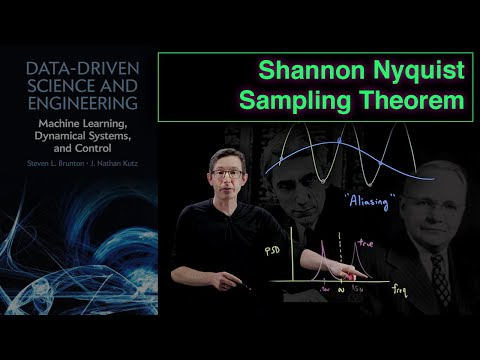

In [33]:
from IPython.display import YouTubeVideo
YouTubeVideo('FcXZ28BX-xE', width=900, height=600)

### *__PRACTICAL EXAMPLE__*

Let's apply the Nyquist-Shannon Sampling Theorem to a dataset of Bitcoin's close prices, which are sampled at 5-minute intervals over a 24-hour period.

#### __1. Understanding Your Data:__

- __Interval of data__: You are sampling the Bitcoin close price every 5 minutes.
- __Duration of data__: You are analyzing a 24-hour window.


Actually the dataset is sampled every 1 second. Let's resample the data to 5 minute intervals.

We can do so with simple pandas function *__df.resample__* :

In [34]:
df = pd.read_csv("sql_ohlc.csv")
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp' , inplace=True)
df_resampled = df.resample('5min').mean()
df_resampled = df_resampled.drop(columns=['Open', 'High', 'Low', 'Volume'])
df_resampled.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2444 entries, 2024-09-25 17:20:00 to 2024-10-04 04:55:00
Freq: 5min
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2437 non-null   float64
dtypes: float64(1)
memory usage: 38.2 KB



#### __2. Let’s calculate the sampling rate and the Highest & Lowest capturable frequency of the data:__

#### __Sampling Rate__

*To calculate the __sampling rate__ , we need to know how often the data is sampled in terms of "samples per second." However, the data is collected every 5 minutes, so let’s calculate the sampling rate in terms of "samples per minute" first :*

* Sampling interval = 5 minutes = 1 sample every 5 minutes
* So the *__sampling rate__* = 1/5 samples per minute = 0.2 samples per minute.

*To express this in seconds :*

* 5 Minutes = 300 Seconds , so the sampling rate is 1/300 samples per second = 0.0033 samples per second.

So the __Sampling Rate__ of Bitcoin’s close prices gives us a rate of 0.0033 samples per second!

#### __Highest Frequency Capturable__

Highest Frequency (Nyquist Frequency)
The Nyquist frequency is the maximum frequency that can be captured in the sampled data without aliasing. 

It's calculated as half of the sampling rate.

* Highest frequency = 1/2 x Sampling Rate 

* i.e. = 1/2 x 1/300 = 1/600 Hz

* This means the highest frequency that can be accurately captured is 1 cycle per 600 seconds (or one cycle every 10 minutes, which is approximately 0.00167 Hz).

#### __Lowest Frequency Capturable__

The lowest frequency that can be captured is determined by the length of the time window you're analyzing. This corresponds to the frequency of a signal that completes one full cycle over the entire observation window.

Let's assume a window size of 24 hours :

* 1 / Window Length
* Duration = 24×60=1440 minutes = 1440 x 60 = 86400 seconds.
* Therefore, the lowest frequency is  1 / 86400 ≈ 0.00001157Hz
* This means the lowest frequency you can analyze is the one that completes one cycle over 24 hours, which corresponds to 1 cycle per day or 0.000694 Hz.

__Summary of Frequencies for given Bitcoin Dataset:__

* Highest Frequency: 0.00167Hz (one cycle every 10 minutes).
* Lowest Frequency: 0.00001157Hz (one cycle every 24 hours).

This gives us the frequency range we can analyze using for instance Short Term Fourier Transform or other frequency domain methods when working with this dataset.



#### Lets try it out!

## __Practical Example - Applying Short Term Fourier Transform__

In [35]:
start_time = '2024-10-01 00:00:00'
start_time = pd.to_datetime(start_time)
end_time = start_time + pd.Timedelta(hours=24)

In [36]:
end_time 

Timestamp('2024-10-02 00:00:00')

In [37]:
df_24h_window = df_resampled[start_time:end_time]

In [38]:
df_24h_window.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 289 entries, 2024-10-01 00:00:00 to 2024-10-02 00:00:00
Freq: 5min
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   289 non-null    float64
dtypes: float64(1)
memory usage: 4.5 KB


In [39]:
df_24h_window.shape

 

(289, 1)

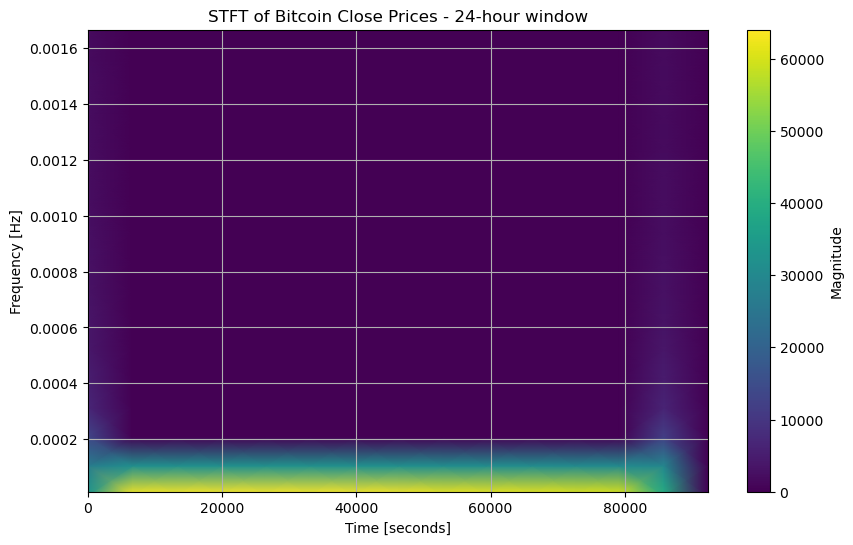

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import stft


# Lets apply the calculations &  Define parameters for STFT

fs = 1 / (5 * 60) # Sampling Rate
highest_frequency = fs / 2 # Nyquist Frequency (highest capturable frequency)
lowest_frequency = 1 / (len(df_24h_window) * 5 * 60) # One cycle over the whole dataset
#print(highest_frequency , lowest_frequency)
capturables = [lowest_frequency , highest_frequency]



fs = 1 / (5 * 60)
nperseg = 32 # Window size (number of data points per segment)
noverlap = nperseg // 3  # 50% overlap

close_prices = df_24h_window['Close'].values
# Apply Short-Time Fourier Transform (STFT)
frequencies, times, Zxx = stft(close_prices, fs=fs, nperseg=nperseg, noverlap=noverlap)

# Plot the magnitude of the STFT
plt.figure(figsize=(10, 6))
plt.pcolormesh(times, frequencies, np.abs(Zxx), shading='gouraud')
plt.title('STFT of Bitcoin Close Prices - 24-hour window')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [seconds]')
plt.colorbar(label='Magnitude')

# Limit the frequency range to the capturable range
plt.ylim(capturables)  # Highest & lowest capturable frequencies
plt.grid(True)
plt.show()


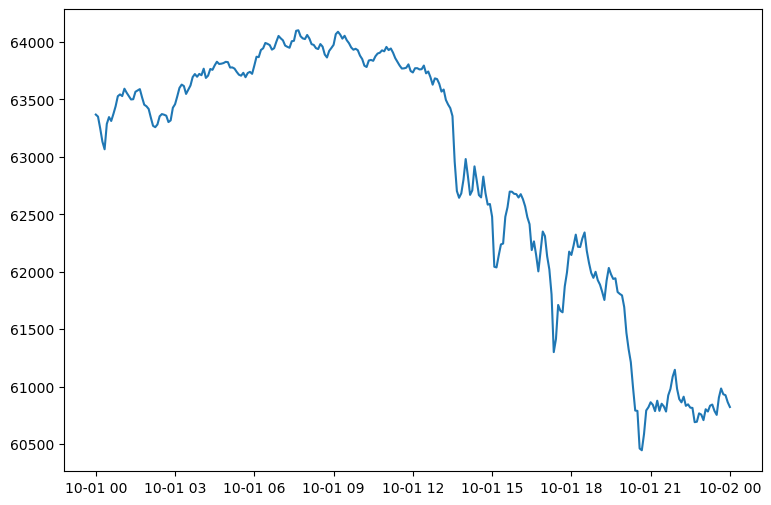

In [41]:
plt.figure(figsize=(9, 6))
plt.plot(df_24h_window)
plt.show()

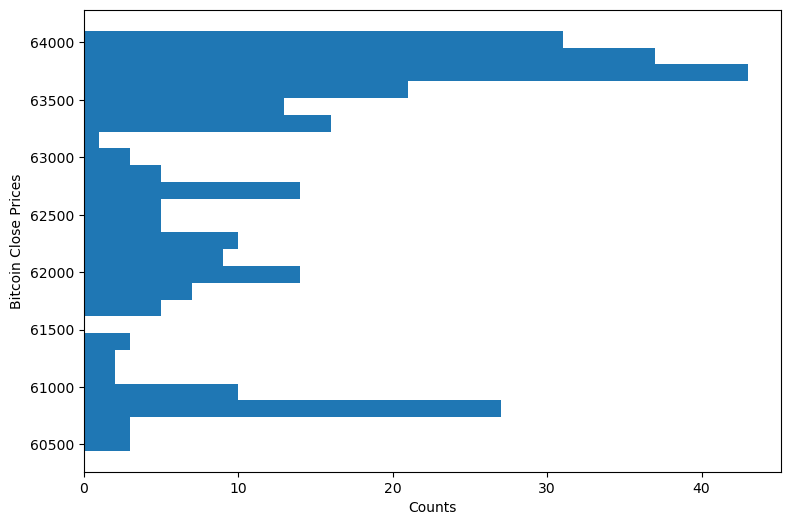

In [42]:
plt.figure(figsize=(9, 6))
plt.hist(df_24h_window['Close'], bins=25, orientation='horizontal')
plt.xlabel('Counts')  
plt.ylabel('Bitcoin Close Prices')  
plt.show()



#

#### lets try one more example with different period

In [43]:
start_time = '2024-10-02 00:00:00'
start_time = pd.to_datetime(start_time)
end_time = start_time + pd.Timedelta(hours=24)
end_time 

Timestamp('2024-10-03 00:00:00')

In [44]:
df_24h_window_2 = df_resampled[start_time:end_time]
df_24h_window_2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 289 entries, 2024-10-02 00:00:00 to 2024-10-03 00:00:00
Freq: 5min
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   289 non-null    float64
dtypes: float64(1)
memory usage: 4.5 KB


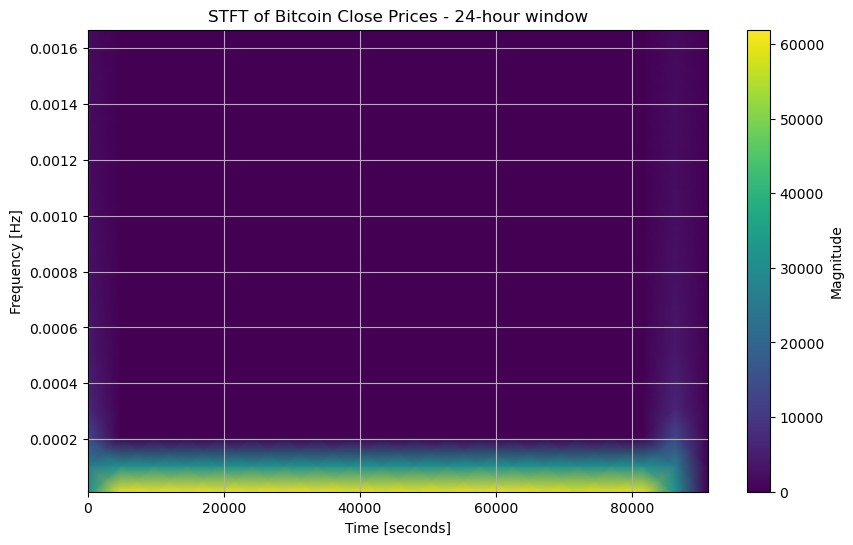

In [45]:
fs = 1 / (5 * 60) # Sampling Rate
highest_frequency = fs / 2 # Nyquist Frequency (highest capturable frequency)
lowest_frequency = 1 / (len(df_24h_window_2) * 5 * 60) # One cycle over the whole dataset
#print(highest_frequency , lowest_frequency)
capturables = [lowest_frequency , highest_frequency]



fs = 1 / (5 * 60)
nperseg = 32 # Window size (number of data points per segment)
#noverlap = nperseg // 2  # 50% overlap

close_prices = df_24h_window_2['Close'].values
# Apply Short-Time Fourier Transform (STFT)
frequencies, times, Zxx = stft(close_prices, fs=fs, nperseg=nperseg)

# Plot the magnitude of the STFT
plt.figure(figsize=(10, 6))
plt.pcolormesh(times, frequencies, np.abs(Zxx), shading='gouraud')
plt.title('STFT of Bitcoin Close Prices - 24-hour window')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [seconds]')
plt.colorbar(label='Magnitude')

# Limit the frequency range to the capturable range
plt.ylim(capturables)  # Highest & lowest capturable frequencies
plt.grid(True)
plt.show()

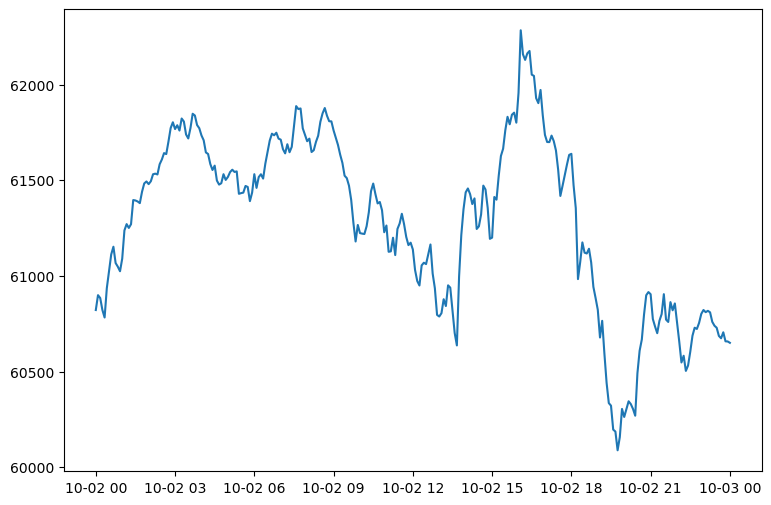

In [46]:
plt.figure(figsize=(9, 6))
plt.plot(df_24h_window_2)
plt.show()

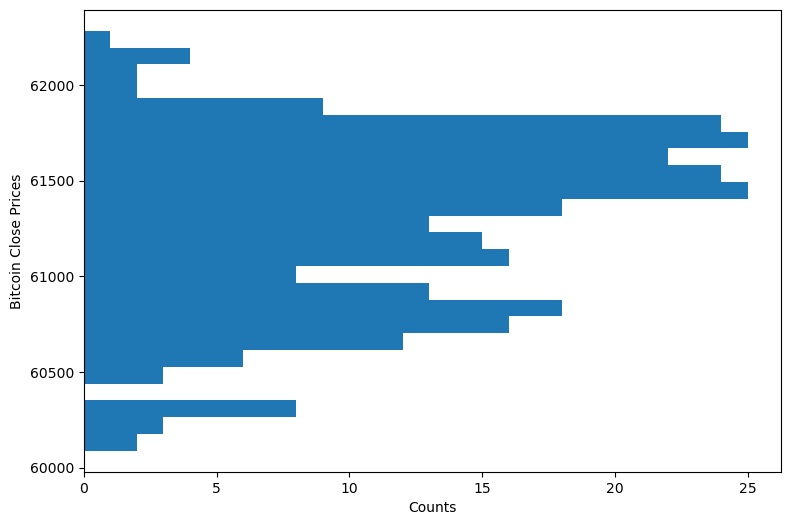

In [47]:
plt.figure(figsize=(9, 6))
plt.hist(df_24h_window_2['Close'], bins=25, orientation='horizontal')
plt.xlabel('Counts')  
plt.ylabel('Bitcoin Close Prices')  
plt.show()

In [48]:
# Lets try to apply STFT on the whole dataset from earlier where sample frequency: 1 sample per 1 minute and dataset window length = 2444

In [57]:
df_resampled.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2444 entries, 2024-09-25 17:20:00 to 2024-10-04 04:55:00
Freq: 5min
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2437 non-null   float64
dtypes: float64(1)
memory usage: 102.7 KB


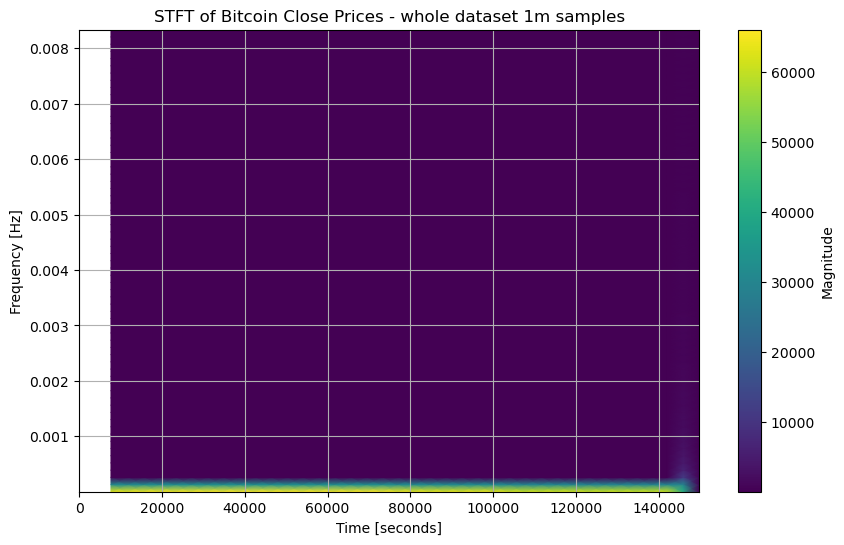

In [58]:
# Lets apply the calculations &  Define parameters for STFT

fs = 1 / (1 * 60) # Sampling Rate
highest_frequency = fs / 2 # Nyquist Frequency (highest capturable frequency)
lowest_frequency = 1 / (len(df_resampled) * 5 * 60) 
#print(highest_frequency , lowest_frequency)
capturables = [lowest_frequency , highest_frequency]

nperseg = 128 # Window size (number of data points per segment)
noverlap = nperseg // 2  # 50% overlap

close_prices = df_resampled['Close'].values
# Apply Short-Time Fourier Transform (STFT)
frequencies, times, Zxx = stft(close_prices, fs=fs, nperseg=nperseg, noverlap=noverlap)

# Plot the magnitude of the STFT
plt.figure(figsize=(10, 6))
plt.pcolormesh(times, frequencies, np.abs(Zxx), shading='gouraud')
plt.title('STFT of Bitcoin Close Prices - whole dataset 1m samples')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [seconds]')
plt.colorbar(label='Magnitude')

# Limit the frequency range to the capturable range
plt.ylim(capturables)  # Highest & lowest capturable frequencies
plt.grid(True)
plt.show()

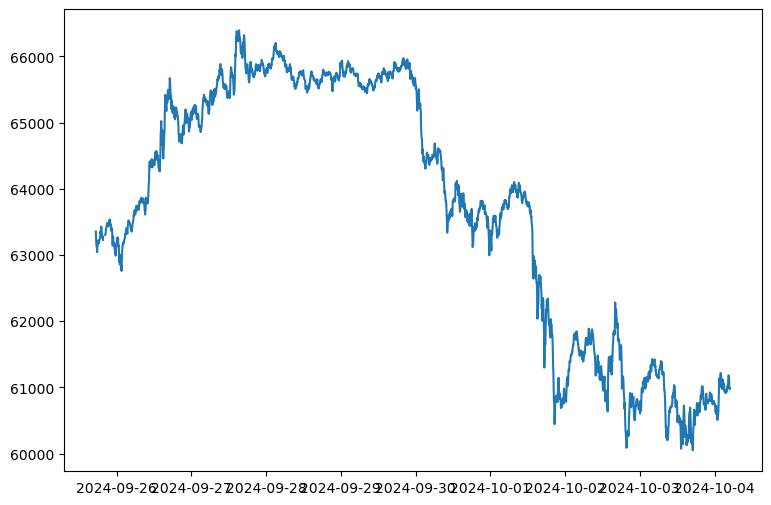

In [51]:
plt.figure(figsize=(9, 6))
plt.plot(df_resampled)
plt.show()

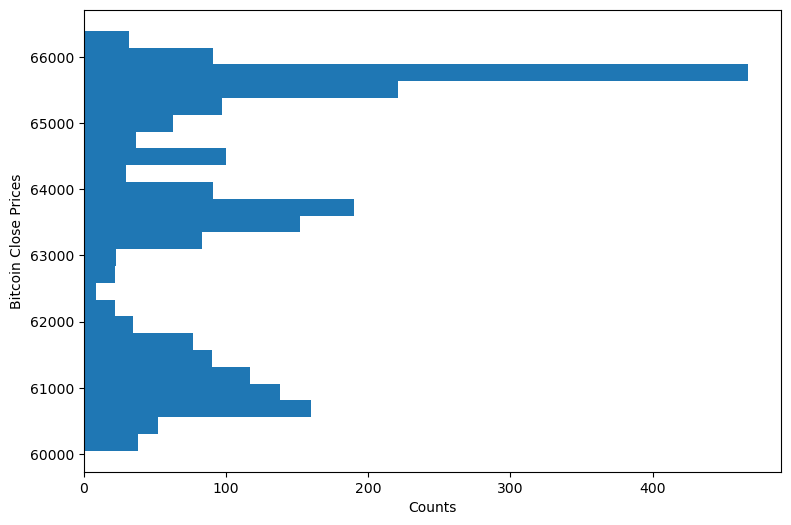

In [52]:
plt.figure(figsize=(9, 6))
plt.hist(df_resampled['Close'], bins=25, orientation='horizontal')
plt.xlabel('Counts')  
plt.ylabel('Bitcoin Close Prices')  
plt.show()




### STFT Parameters to concider

* x : array_like
    Time series of measurement values
    
* fs : float, optional
    Sampling frequency of the `x` time series. Defaults to 1.0.
    
* window : str or tuple or array_like, optional
    Desired window to use. If `window` is a string or tuple, it is
    passed to `get_window` to generate the window values, which are
    DFT-even by default. See `get_window` for a list of windows and
    required parameters. If `window` is array_like it will be used
    directly as the window and its length must be nperseg. Defaults
    to a Hann window.
    
* nperseg : int, optional
    Length of each segment. Defaults to 256.
    
* noverlap : int, optional
    Number of points to overlap between segments. If `None`,
    ``noverlap = nperseg // 2``. Defaults to `None`. When
    specified, the COLA constraint must be met (see Notes below).
    
* nfft : int, optional
    Length of the FFT used, if a zero padded FFT is desired. If
    `None`, the FFT length is `nperseg`. Defaults to `None`.
    
* detrend : str or function or `False`, optional
    Specifies how to detrend each segment. If `detrend` is a
    string, it is passed as the `type` argument to the `detrend`
    function. If it is a function, it takes a segment and returns a
    detrended segment. If `detrend` is `False`, no detrending is
    done. Defaults to `False`.
    
* return_onesided : bool, optional
    If `True`, return a one-sided spectrum for real data. If
    `False` return a two-sided spectrum. Defaults to `True`, but for
    complex data, a two-sided spectrum is always returned.
    
* boundary : str or None, optional
    Specifies whether the input signal is extended at both ends, and
    how to generate the new values, in order to center the first
    windowed segment on the first input point. This has the benefit
    of enabling reconstruction of the first input point when the
    employed window function starts at zero. Valid options are
    ``['even', 'odd', 'constant', 'zeros', None]``. Defaults to
    'zeros', for zero padding extension. I.e. ``[1, 2, 3, 4]`` is
    extended to ``[0, 1, 2, 3, 4, 0]`` for ``nperseg=3``.
    
* padded : bool, optional
    Specifies whether the input signal is zero-padded at the end to
    make the signal fit exactly into an integer number of window
    segments, so that all of the signal is included in the output.
    Defaults to `True`. Padding occurs after boundary extension, if
    `boundary` is not `None`, and `padded` is `True`, as is the
    default.
    
* axis : int, optional
    Axis along which the STFT is computed; the default is over the
    last axis (i.e. ``axis=-1``).
    
* scaling: {'spectrum', 'psd'}
    The default 'spectrum' scaling allows each frequency line of `Zxx` to
    be interpreted as a magnitude spectrum. The 'psd' option scales each
    line to a power spectral density - it allows to calculate the signal's
    energy by numerically integrating over ``abs(Zxx)**2``.

## *__Aliasing__*

Aliasing occurs when higher frequency components of a signal are misinterpreted as lower frequency components during sampling. This happens if the signal contains frequencies higher than half the sampling rate (the Nyquist frequency). Aliasing can distort the signal and lead to inaccurate representations.

Aliasing can lead to incorrect interpretations of signals. For example, if high-frequency noise is not filtered out, it can appear as false trends or patterns in the data. By using an __anti-aliasing filter__, you ensure that the sampled data does not contain these misleading artifacts, leading to more reliable signals.


In conclusion, Nyquist Sampling Theorem is used to determine the sampling level without aliasing in Digital Communication. It is very important to reproduce any signal without noise, and used in various fields such as Audio and Digital transmission, Radio Signals and FM radio signals. It is mainly used to prevent distortion in Digital audio communication.

## *__Checksums algorithms__*

https://www.geeksforgeeks.org/understanding-checksum-algorithm-for-data-integrity/#use-cases-of-checksum-algorithms

# *__TO BE CONTINUED...__*